In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as rmse

plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize

In [2]:
recovery_2d = pd.read_csv('_Recovery_data/Series_2d_recovery_50.csv', index_col=0)
recovery_3d = pd.read_csv('_Recovery_data/Series_3d_recovery_50.csv', index_col=0)
recovery_4d = pd.read_csv('_Recovery_data/Series_4d_recovery_50.csv', index_col=0)

mu_2d_true = np.append([recovery_2d['mu1_true'], 
                        recovery_2d['mu2_true']], 0)
mu_2d_estimate = np.append([recovery_2d['mu1_estimate'], 
                            recovery_2d['mu2_estimate']], 0)

mu_3d_true = np.append([recovery_3d['mu1_true'],
                        recovery_3d['mu2_true'],
                        recovery_3d['mu3_true']], 0)
mu_3d_estimate = np.append([recovery_3d['mu1_estimate'],
                            recovery_3d['mu2_estimate'],
                            recovery_3d['mu3_estimate']], 0)

mu_4d_true = np.append([recovery_4d['mu1_true'],
                        recovery_4d['mu2_true'],
                        recovery_4d['mu3_true'],
                        recovery_4d['mu4_true']], 0)
mu_4d_estimate = np.append([recovery_4d['mu1_estimate'],
                            recovery_4d['mu2_estimate'],
                            recovery_4d['mu3_estimate'],
                            recovery_4d['mu4_estimate']], 0)

In [3]:
print(rmse(y_true=recovery_2d['threshold_true'], y_pred=recovery_2d['threshold_estimate']))
print(rmse(y_true=recovery_2d['ndt_true'], y_pred=recovery_2d['ndt_estimate']))
print(rmse(y_true=mu_2d_true, y_pred=mu_2d_estimate))

print('============')

print(rmse(y_true=recovery_3d['threshold_true'], y_pred=recovery_3d['threshold_estimate']))
print(rmse(y_true=recovery_3d['ndt_true'], y_pred=recovery_3d['ndt_estimate']))
print(rmse(y_true=mu_3d_true, y_pred=mu_3d_estimate))

print('============')

print(rmse(y_true=recovery_4d['threshold_true'], y_pred=recovery_4d['threshold_estimate']))
print(rmse(y_true=recovery_4d['ndt_true'], y_pred=recovery_4d['ndt_estimate']))
print(rmse(y_true=mu_4d_true, y_pred=mu_4d_estimate))

0.26048790586830683
0.06980906888170801
0.1286014562955972
0.22563325989043798
0.027202072940207104
0.28087678335639427
0.18156803851684888
0.03173218987073662
0.16719183775447324


In [4]:
print(r2_score(y_true=recovery_2d['threshold_true'], y_pred=recovery_2d['threshold_estimate']))
print(r2_score(y_true=recovery_2d['ndt_true'], y_pred=recovery_2d['ndt_estimate']))
print(r2_score(y_true=mu_2d_true, y_pred=mu_2d_estimate))

print('============')

print(r2_score(y_true=recovery_3d['threshold_true'], y_pred=recovery_3d['threshold_estimate']))
print(r2_score(y_true=recovery_3d['ndt_true'], y_pred=recovery_3d['ndt_estimate']))
print(r2_score(y_true=mu_3d_true, y_pred=mu_3d_estimate))

print('============')

print(r2_score(y_true=recovery_4d['threshold_true'], y_pred=recovery_4d['threshold_estimate']))
print(r2_score(y_true=recovery_4d['ndt_true'], y_pred=recovery_4d['ndt_estimate']))
print(r2_score(y_true=mu_4d_true, y_pred=mu_4d_estimate))

0.9696715851993019
0.8891268143077316
0.9984688748037468
0.9881288479991679
0.9828508111941912
0.9942483079061899
0.9771660543638012
0.9854290013515112
0.9974060842906046


In [5]:
print(pearsonr(recovery_2d['threshold_true'], recovery_2d['threshold_estimate'])[0])
print(pearsonr(recovery_2d['ndt_true'], recovery_2d['ndt_estimate'])[0])
print(pearsonr(mu_2d_true, mu_2d_estimate)[0])

print('============')

print(pearsonr(recovery_3d['threshold_true'], recovery_3d['threshold_estimate'])[0])
print(pearsonr(recovery_3d['ndt_true'], recovery_3d['ndt_estimate'])[0])
print(pearsonr(mu_3d_true, mu_3d_estimate)[0])

print('============')

print(pearsonr(recovery_4d['threshold_true'], recovery_4d['threshold_estimate'])[0])
print(pearsonr(recovery_4d['ndt_true'], recovery_4d['ndt_estimate'])[0])
print(pearsonr(mu_4d_true, mu_4d_estimate)[0])

0.9850656084143394
0.9505991569348987
0.9992976070596573
0.9940762596507158
0.9959500035552993
0.9980882809492096
0.998789222768081
0.9985737381537041
0.9989723412900631


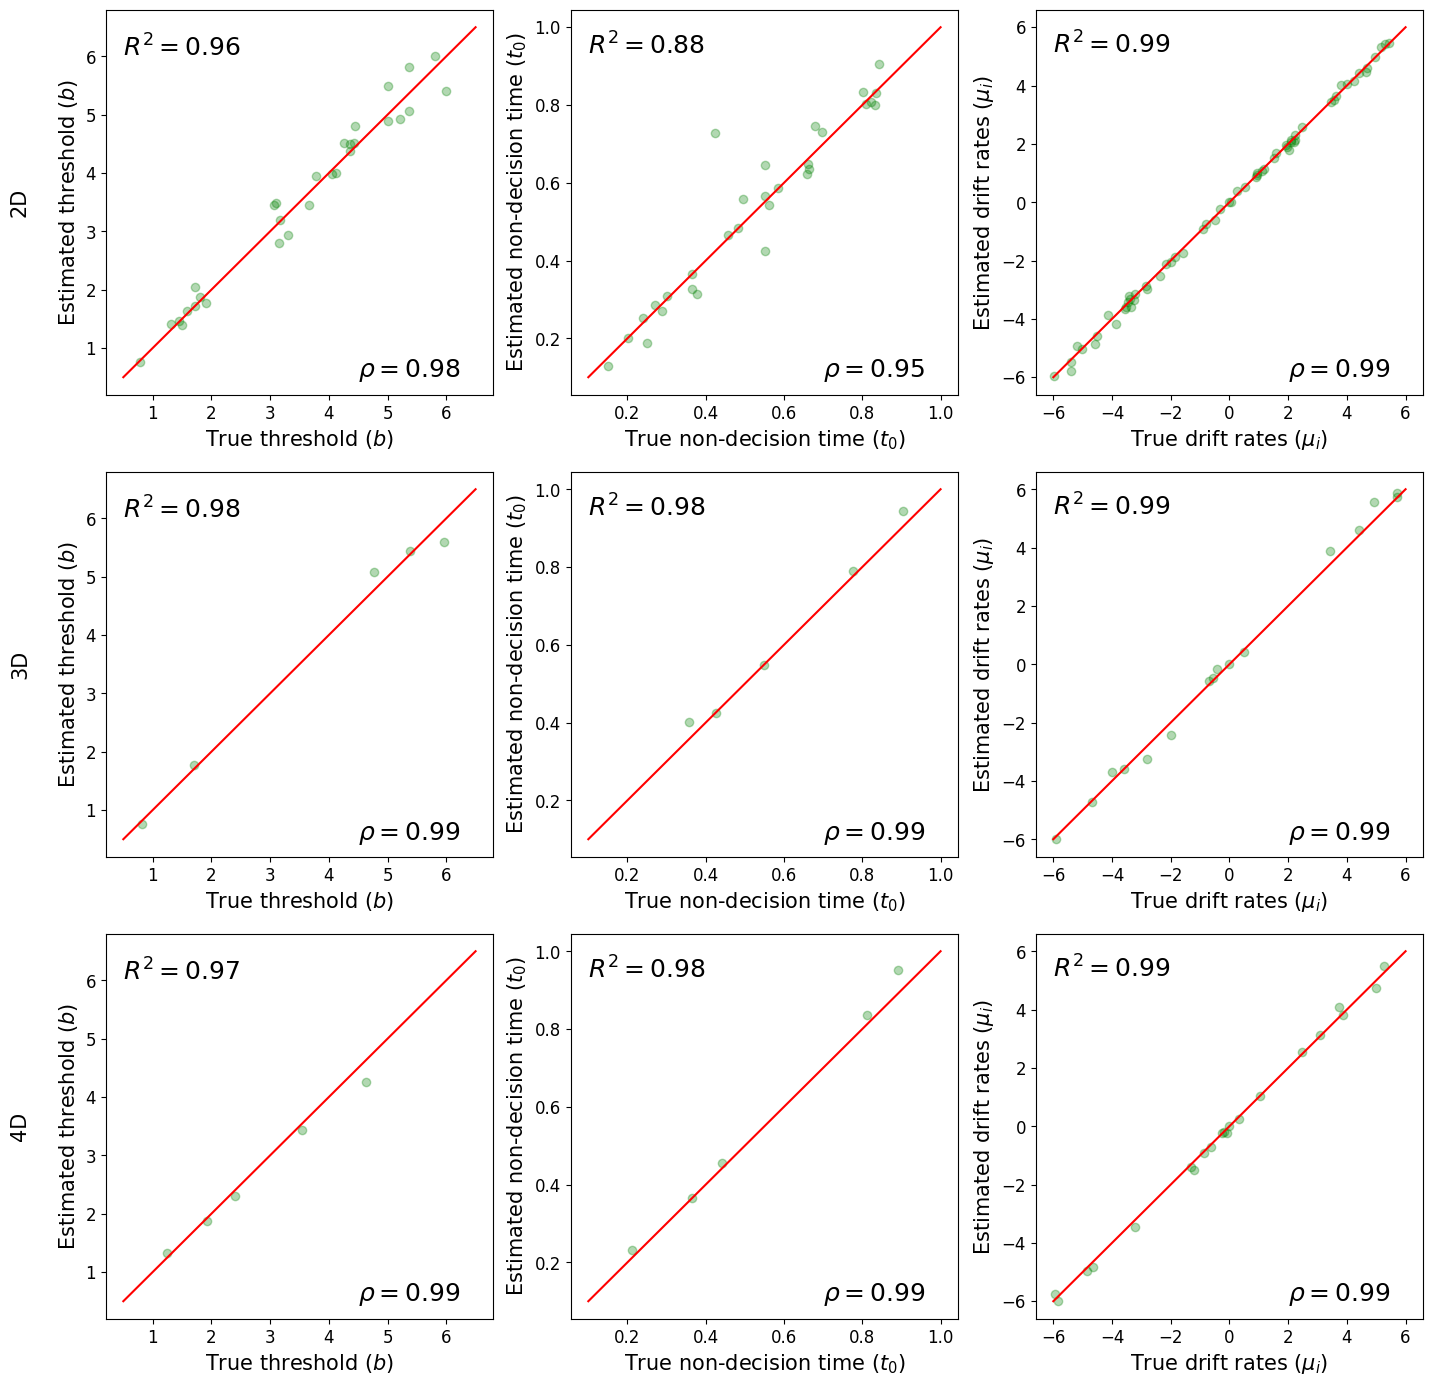

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(17, 17))

axs[0, 0].plot(np.linspace(0.5, 6.5, 100), np.linspace(0.5, 6.5, 100), c='red')
axs[0, 0].scatter(x=recovery_2d['threshold_true'], y=recovery_2d['threshold_estimate'], c='green', alpha=0.3);
axs[0, 0].set_xlabel(r'True threshold ($b$)')
axs[0, 0].set_ylabel('2D\n\nEstimated threshold ($b$)')
R2 = r2_score(y_true=recovery_2d['threshold_true'], y_pred=recovery_2d['threshold_estimate'])
roh = pearsonr(recovery_2d['threshold_true'], recovery_2d['threshold_estimate'])[0]
axs[0, 0].text(0.5, 6, r'$R^2 = {}$'.format(str(R2)[:4]), fontsize = 18)
axs[0, 0].text(4.5, 0.5, r'$\rho = {}$'.format(str(roh)[:4]), fontsize = 18)

axs[0, 1].plot(np.linspace(0.1, 1, 100), np.linspace(0.1, 1, 100), c='red')
axs[0, 1].scatter(x=recovery_2d['ndt_true'], y=recovery_2d['ndt_estimate'], c='green', alpha=0.3);
axs[0, 1].set_xlabel(r'True non-decision time ($t_0$)')
axs[0, 1].set_ylabel(r'Estimated non-decision time ($t_0$)')
R2 = r2_score(y_true=recovery_2d['ndt_true'], y_pred=recovery_2d['ndt_estimate'])
roh = pearsonr(recovery_2d['ndt_true'], recovery_2d['ndt_estimate'])[0]
axs[0, 1].text(0.1, 0.93, r'$R^2 = {}$'.format(str(R2)[:4]), fontsize = 18)
axs[0, 1].text(0.7, 0.1, r'$\rho = {}$'.format(str(roh)[:4]), fontsize = 18)

axs[0, 2].plot(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100), c='red')
axs[0, 2].scatter(x=mu_2d_true, y=mu_2d_estimate, c='green', alpha=0.3);
axs[0, 2].set_xlabel(r'True drift rates ($\mu_i$)')
axs[0, 2].set_ylabel(r'Estimated drift rates ($\mu_i$)')
R2 = r2_score(y_true=mu_2d_true, y_pred=mu_2d_estimate)
roh = pearsonr(mu_2d_true, mu_2d_estimate)[0]
axs[0, 2].text(-6, 5.1, r'$R^2 = {}$'.format(str(R2)[:4]), fontsize = 18)
axs[0, 2].text(2, -6, r'$\rho = {}$'.format(str(roh)[:4]), fontsize = 18)

############

axs[1, 0].plot(np.linspace(0.5, 6.5, 100), np.linspace(0.5, 6.5, 100), c='red')
axs[1, 0].scatter(x=recovery_3d['threshold_true'], y=recovery_3d['threshold_estimate'], c='green', alpha=0.3);
axs[1, 0].set_xlabel(r'True threshold ($b$)')
axs[1, 0].set_ylabel('3D\n\nEstimated threshold ($b$)')
R2 = r2_score(y_true=recovery_3d['threshold_true'], y_pred=recovery_3d['threshold_estimate'])
roh = pearsonr(recovery_3d['threshold_true'], recovery_3d['threshold_estimate'])[0]
axs[1, 0].text(0.5, 6, r'$R^2 = {}$'.format(str(R2)[:4]), fontsize = 18)
axs[1, 0].text(4.5, 0.5, r'$\rho = {}$'.format(str(roh)[:4]), fontsize = 18)

axs[1, 1].plot(np.linspace(0.1, 1, 100), np.linspace(0.1, 1, 100), c='red')
axs[1, 1].scatter(x=recovery_3d['ndt_true'], y=recovery_3d['ndt_estimate'], c='green', alpha=0.3);
axs[1, 1].set_xlabel(r'True non-decision time ($t_0$)')
axs[1, 1].set_ylabel('Estimated non-decision time ($t_0$)')
R2 = r2_score(y_true=recovery_3d['ndt_true'], y_pred=recovery_3d['ndt_estimate'])
roh = pearsonr(recovery_3d['ndt_true'], recovery_3d['ndt_estimate'])[0]
axs[1, 1].text(0.1, 0.93, r'$R^2 = {}$'.format(str(R2)[:4]), fontsize = 18)
axs[1, 1].text(0.7, 0.1, r'$\rho = {}$'.format(str(roh)[:4]), fontsize = 18)

axs[1, 2].plot(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100), c='red')
axs[1, 2].scatter(x=mu_3d_true, y=mu_3d_estimate, c='green', alpha=0.3);
axs[1, 2].set_xlabel(r'True drift rates ($\mu_i$)')
axs[1, 2].set_ylabel(r'Estimated drift rates ($\mu_i$)')
R2 = r2_score(y_true=mu_3d_true, y_pred=mu_3d_estimate)
roh = pearsonr(mu_3d_true, mu_3d_estimate)[0]
axs[1, 2].text(-6, 5.1, r'$R^2 = {}$'.format(str(R2)[:4]), fontsize = 18)
axs[1, 2].text(2, -6, r'$\rho = {}$'.format(str(roh)[:4]), fontsize = 18)


############

axs[2, 0].plot(np.linspace(0.5, 6.5, 100), np.linspace(0.5, 6.5, 100), c='red')
axs[2, 0].scatter(x=recovery_4d['threshold_true'], y=recovery_4d['threshold_estimate'], c='green', alpha=0.3);
axs[2, 0].set_xlabel(r'True threshold ($b$)')
axs[2, 0].set_ylabel('4D\n\nEstimated threshold ($b$)')
R2 = r2_score(y_true=recovery_4d['threshold_true'], y_pred=recovery_4d['threshold_estimate'])
roh = pearsonr(recovery_4d['threshold_true'], recovery_4d['threshold_estimate'])[0]
axs[2, 0].text(0.5, 6, r'$R^2 = {}$'.format(str(R2)[:4]), fontsize = 18)
axs[2, 0].text(4.5, 0.5, r'$\rho = {}$'.format(str(roh)[:4]), fontsize = 18)

axs[2, 1].plot(np.linspace(0.1, 1, 100), np.linspace(0.1, 1, 100), c='red')
axs[2, 1].scatter(x=recovery_4d['ndt_true'], y=recovery_4d['ndt_estimate'], c='green', alpha=0.3);
axs[2, 1].set_xlabel(r'True non-decision time ($t_0$)')
axs[2, 1].set_ylabel(r'Estimated non-decision time ($t_0$)')
R2 = r2_score(y_true=recovery_4d['ndt_true'], y_pred=recovery_4d['ndt_estimate'])
roh = pearsonr(recovery_4d['ndt_true'], recovery_4d['ndt_estimate'])[0]
axs[2, 1].text(0.1, 0.93, r'$R^2 = {}$'.format(str(R2)[:4]), fontsize = 18)
axs[2, 1].text(0.7, 0.1, r'$\rho = {}$'.format(str(roh)[:4]), fontsize = 18)

axs[2, 2].plot(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100), c='red')
axs[2, 2].scatter(x=mu_4d_true, y=mu_4d_estimate, c='green', alpha=0.3);
axs[2, 2].set_xlabel(r'True drift rates ($\mu_i$)')
axs[2, 2].set_ylabel(r'Estimated drift rates ($\mu_i$)');
R2 = r2_score(y_true=mu_4d_true, y_pred=mu_4d_estimate)
roh = pearsonr(mu_4d_true, mu_4d_estimate)[0]
axs[2, 2].text(-6, 5.1, r'$R^2 = {}$'.format(str(R2)[:4]), fontsize = 18)
axs[2, 2].text(2, -6, r'$\rho = {}$'.format(str(roh)[:4]), fontsize = 18);

# plt.savefig('../../../_01_Figures/ie_recovery.pdf', 
#             transparent=True, 
#             dpi=600, 
#             bbox_inches='tight');